#### Available scene list

In [8]:
import json


f = open('../01_scene_list/scene.json', "r")
scene_json = json.load(f)

# Available scene list
scene_list = list(scene_json.keys())

# Coordinate conversion
scene_dict = scene_json

f.close()

#### Visualize global wall mask

In [19]:
import os

from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from utils import read_wall_xml


def visualize_layout(s_idx):
    """Visualize wall mask on scene map

    Args:
        s_idx (int): identifier of scene
    """
    
    scene_id = scene_list[s_idx]
    fig, ax = plt.subplots()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    # Read map image
    mp_pth = "E:\datasets\iGibson-dataset\scene_map/"
    mp_pth = f"{mp_pth}/{scene_id}/{scene_id}.png"
    mp_img = Image.open(mp_pth).convert("RGB")
    plt.imshow(mp_img)

    # Read layout xml file
    ly_pth = "E:\datasets\iGibson-dataset\scene_layout/"
    ly_pth = f"{ly_pth}/{scene_id}/{scene_id}.xml"
    ly_data = read_wall_xml(ly_pth)
    print(f"Trajectory consists {len(ly_data)} walls")

    # Translate wall masks to map coordinate
    scene_trans = scene_dict[scene_id]
    
    for wall in ly_data:
        
        wall_pos = [
            wall[0],
            wall[1]
        ]
        
        wall_sc = [
            wall[2] - wall[0],
            wall[3] - wall[1]
        ]
        
        rect = Rectangle(
            (
                wall_pos[0],
                wall_pos[1]
            ),
            wall_sc[0],
            wall_sc[1],
            edgecolor='red',
            facecolor="red"
        )
        ax.add_patch(rect)
        
    # Save map image
    obj_vis_pth = f"E:\datasets\iGibson-dataset\scene_layout_vis/{scene_id}"
    if not os.path.exists(obj_vis_pth):
        os.makedirs(obj_vis_pth)
    plt.savefig(f"{obj_vis_pth}/layout.png", bbox_inches='tight')

Beechwood_1_int
Trajectory consists 59 walls
Ihlen_0_int


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\datasets\\iGibson-dataset\\scene_layout//Ihlen_0_int/Ihlen_0_int.xml'

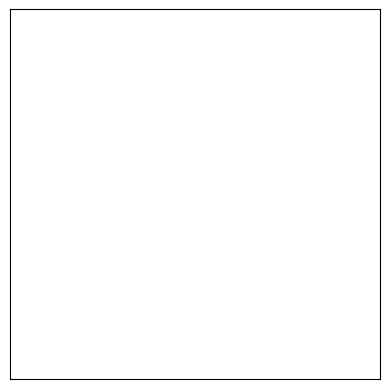

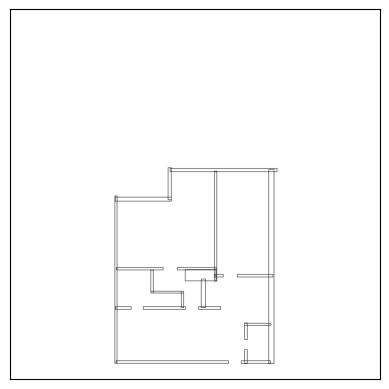

In [20]:
s_idx_list = [1, 3, 4, 5, 6]
s_label = "window"

for s_idx in s_idx_list:
    
    print(scene_list[s_idx])
    visualize_layout(s_idx)
    plt.cla()
    
plt.close("all")